In [13]:
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions


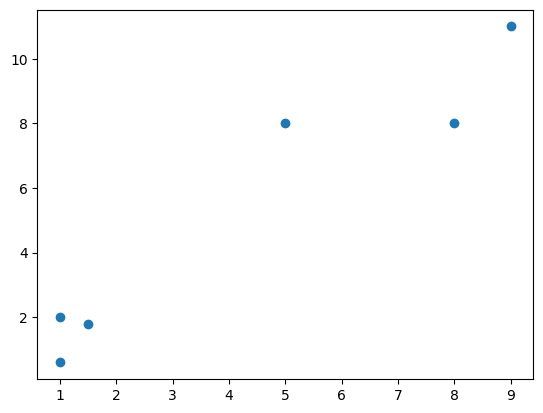

In [2]:
x1 = [1, 5, 1.5, 8, 1, 9]
x2 = [2, 8, 1.8, 8, 0.6, 11]
plt.scatter(x1,x2,marker='o')
plt.show()

In [3]:
feature=np.array([[1,2,0],
         [5,8,1],
         [1.5,1.8,0],
         [8,8,1],
         [1,0.6,0],
         [9,11,1]])

In [4]:
clf = svm.SVC(kernel='linear',C=1.0)

In [5]:
X_features=feature[:,:2]
y_features=feature[:,2]

In [6]:
clf.fit(X_features,y_features)

SVC(kernel='linear')

[0.1380943  0.24462418]


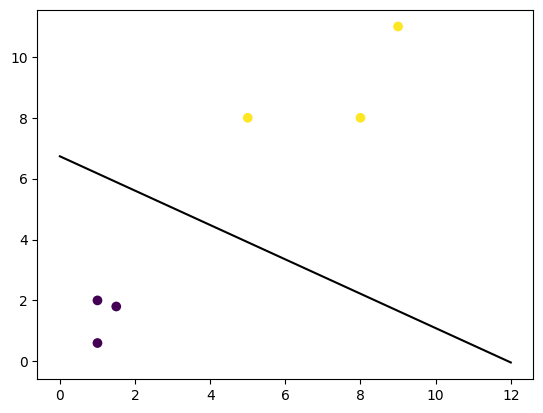

In [7]:
w = clf.coef_[0]
print(w)
a = -w[0] / w[1]
xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]
h0 = plt.plot(xx, yy, 'k-', label="non weighted div")
plt.scatter(feature[:, 0], feature[:, 1], c = y_features)
plt.show()

In [8]:
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC

dataset = datasets.load_iris()

model = SVC()
model.fit(dataset.data, dataset.target)
print(model)

expected = dataset.target
predicted = model.predict(dataset.data)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

SVC()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]


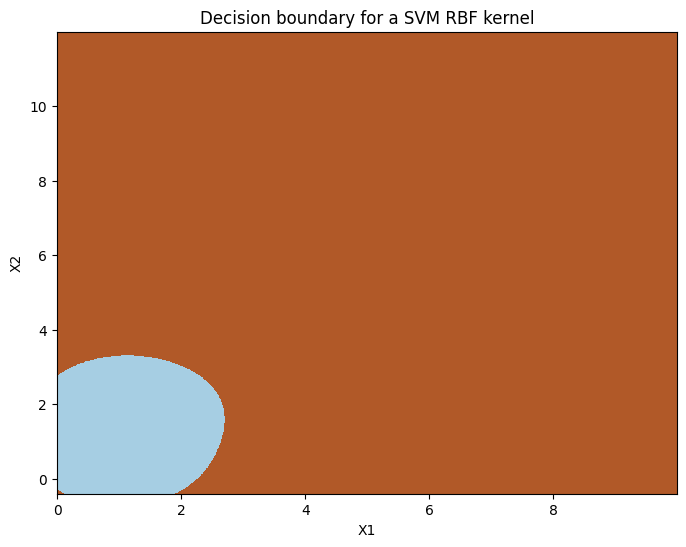

In [21]:
clf=svm.SVC(kernel='rbf', gamma=0.7, C=1)
clf.fit(X_features,y_features)
x1_min, x1_max = feature[:, 0].min() - 1, feature[:, 0].max() + 1
x2_min, x2_max = feature[:, 1].min() - 1, feature[:, 1].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                     np.arange(x2_min, x2_max, 0.01))

Z = clf.predict(np.array([x1.ravel(), x2.ravel()]).T)

Z = Z.reshape(x1.shape)
plt.figure(figsize=(8, 6))
plt.pcolormesh(x1, x2, Z, cmap=plt.cm.Paired)

plt.scatter(feature[:, 0], feature[:, 1], c=feature[:, 2], cmap=plt.cm.Paired)
plt.axis('tight')

plt.title("Decision boundary for a SVM RBF kernel")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


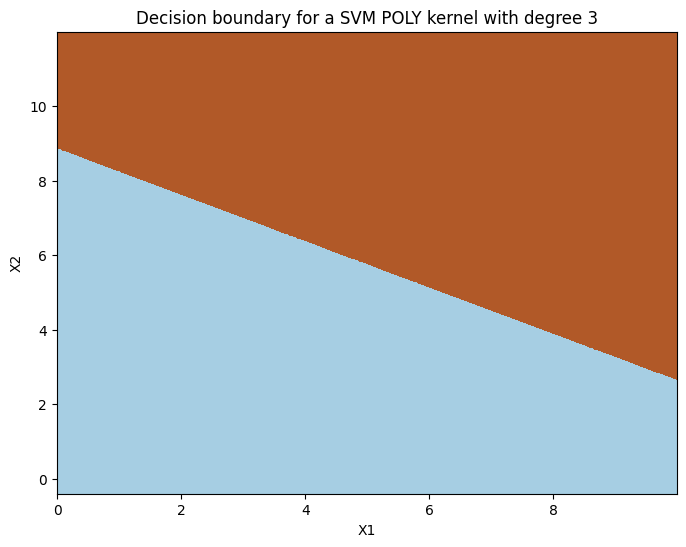

In [24]:
clf=svm.SVC(kernel='poly', degree=3, C=1)
clf.fit(X_features,y_features)
Z = clf.predict(np.array([x1.ravel(), x2.ravel()]).T)

Z = Z.reshape(x1.shape)
plt.figure(figsize=(8, 6))
plt.pcolormesh(x1, x2, Z, cmap=plt.cm.Paired)

plt.scatter(feature[:, 0], feature[:, 1], c=feature[:, 2], cmap=plt.cm.Paired)
plt.axis('tight')

plt.title("Decision boundary for a SVM POLY kernel with degree 3")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = np.array([[1, 2],
              [5, 8],
              [1.5, 1.8],
              [8, 8],
              [1, 0.6],
              [9, 11]])

y = np.array([0, 1, 0, 1, 0, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

svm_clf = svm.SVC(kernel='linear', C=1.0)
knn_clf = KNeighborsClassifier(n_neighbors=3)
logreg_clf = LogisticRegression()

svm_clf.fit(X_train_std, y_train)
knn_clf.fit(X_train_std, y_train)
logreg_clf.fit(X_train_std, y_train)

svm_predictions = svm_clf.predict(X_test_std)
knn_predictions = knn_clf.predict(X_test_std)
logreg_predictions = logreg_clf.predict(X_test_std)

svm_accuracy = accuracy_score(y_test, svm_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

print(f'SVM Accuracy: {svm_accuracy:.2f}')
print(f'kNN Accuracy: {knn_accuracy:.2f}')
print(f'Logistic Regression Accuracy: {logreg_accuracy:.2f}')

SVM Accuracy: 1.00
kNN Accuracy: 1.00
Logistic Regression Accuracy: 1.00
